In [19]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import os
os.chdir('/Users/yuxiding/Desktop/vis')

In [4]:
from GlucoCheck.glucoCheck import glucoCheckOps
glucoCheckObject = glucoCheckOps()
glucoCheckObject.consolidatedData

Object Created!


,Display Time,GlucoseValue,subjectId
0,2016-06-21 00:00:00,197.0,GVP01
1,2016-06-21 00:15:00,208.0,GVP01
2,2016-06-21 00:30:00,226.0,GVP01
3,2016-06-21 00:45:00,241.0,GVP01
4,2016-06-21 01:00:00,250.0,GVP01
...,...,...,...
316522,2025-06-28 23:36:00,206.0,OD584
316523,2025-06-28 23:41:00,208.0,OD584
316524,2025-06-28 23:46:00,213.0,OD584
316525,2025-06-28 23:51:00,224.0,OD584


In [5]:
def splitDay(data, uid):
    fmt_1 = '%Y-%m-%d %H:%M:%S'
    fmt_2 = '%Y-%m-%d %H'
    fmt_3 = '%Y-%m-%d'
    
    new = data[data['subjectId']==str(uid)]
    new = new.astype({'GlucoseValue':int})
    
    x = new.copy()
    x['Day'] = x['Display Time']
    for idx in range(x.shape[0]):      
        x['Day'].iloc[idx] = datetime.strptime(x['Display Time'].iloc[idx], fmt_1).strftime(fmt_3)
    dict_of_day = dict(iter(x.groupby('Day')))
        
    return x, dict_of_day

In [22]:
splitDay(glucoCheckObject.consolidatedData, '1636-69-032')[0]

,Display Time,GlucoseValue,subjectId,Day
51457,2016-01-13 12:58:17,122,1636-69-032,2016-01-13
51458,2016-01-13 13:03:17,123,1636-69-032,2016-01-13
51459,2016-01-13 13:08:17,124,1636-69-032,2016-01-13
51460,2016-01-13 13:13:17,128,1636-69-032,2016-01-13
51461,2016-01-13 13:18:17,133,1636-69-032,2016-01-13
...,...,...,...,...
53235,2016-01-19 17:12:49,101,1636-69-032,2016-01-19
53236,2016-01-19 17:17:49,98,1636-69-032,2016-01-19
53237,2016-01-19 17:22:49,101,1636-69-032,2016-01-19
53238,2016-01-19 17:27:49,106,1636-69-032,2016-01-19


In [13]:
def plotDay(uid, data):
    
    dic_day = splitDay(data, uid)[1] 
    for i in dic_day:
        
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        
        new = dic_day[i]
        new = new.astype({'GlucoseValue':int})
        new['Display Time'] = pd.to_datetime(new['Display Time'])

        lines = ax1.plot_date(new['Display Time'], new['GlucoseValue'], linestyle='None', marker='o', mfc='none')
        ax1.axhline(70, ls='--', c = 'red')
        ax1.axhline(140, ls='--', c = 'red')
        
        new['Display Time'] = pd.to_datetime(new['Display Time'])
        ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))
        plt.xticks(rotation=30)
        plt.title('Glucose Values for\n' + str(i), fontsize=17, weight='bold')
        plt.xlabel('Display Time', fontsize=15, weight='bold')
        plt.ylabel('Glucose Values',fontsize=15, weight='bold')

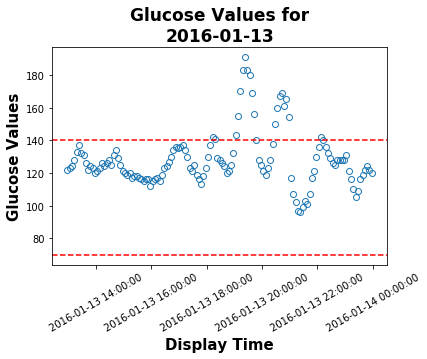

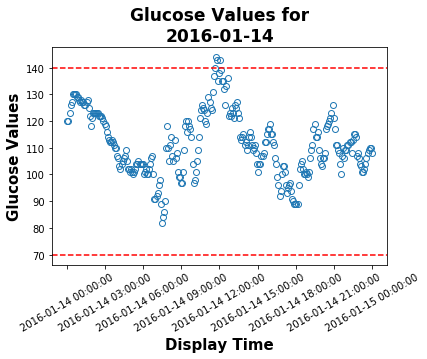

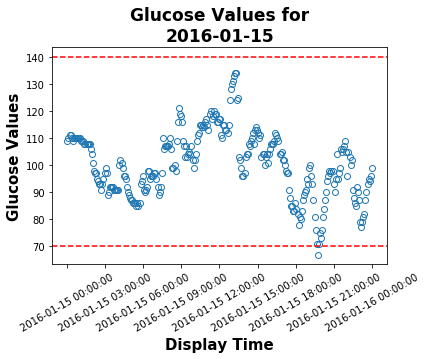

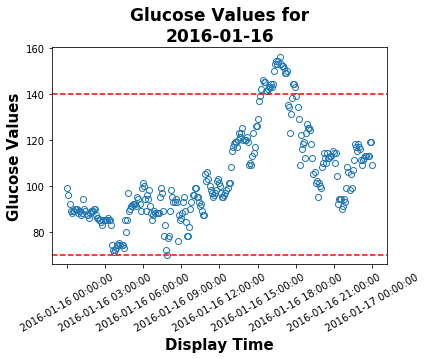

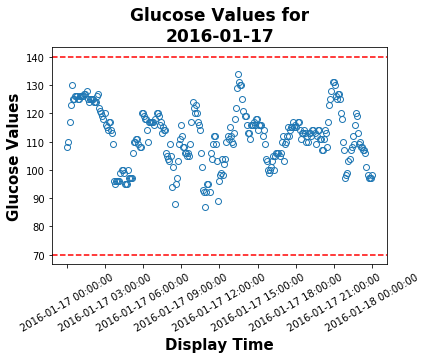

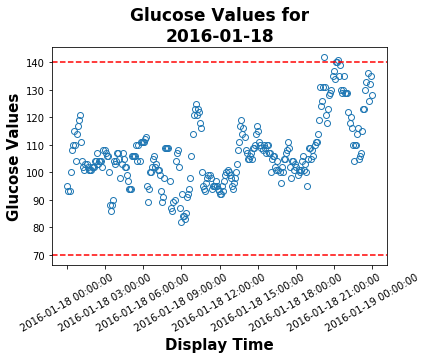

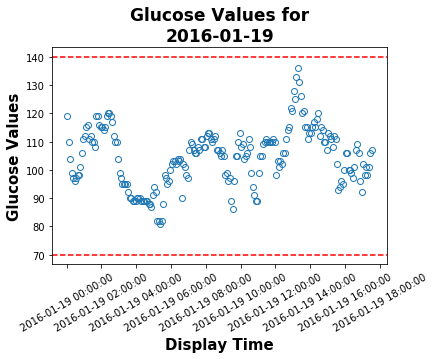

In [20]:
plotDay('1636-69-032', data = glucoCheckObject.consolidatedData)